# Problem Statments

- An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

- The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos.
- When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals.
- Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

- Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, **the company wishes to identify the most potential leads, also known as ‘Hot Leads’**.
- If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.


# Goal

1. Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted
2. There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.


### Step 1 : Importing Libraries and Data

In [1745]:
#Suppresssing warnings
import warnings
warnings.filterwarnings('ignore')

In [1746]:
# Import Library
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1747]:
# Import leads.csv dataset
df = pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Step 2: Inspecting the Dataframe

In [1748]:
# Check data frame info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [1749]:
# Desciribe
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [1750]:
#check for duplicates
sum(df.duplicated(subset = 'Prospect ID')) == 0

True

No duplicate values exist in 'Prospect ID'

### Step 3: Data Cleaning

#### 3.1 Identifying Missing Values

As mentioned in the data description section, categorical variables with select values need to be processed, so we will replace these values with null values from the beginning

In [1751]:
df.replace('Select',None,inplace= True)

In [1752]:
# Create function to check null values of dataframe
def percent_null(df):
    # filter out columns with no null values
    cols_with_nulls = df.columns[df.isnull().any()]
    return df[cols_with_nulls].isnull().mean() * 100

In [1753]:
# Check the missing values of columns
null_cols = percent_null(df)
null_cols

Lead Source                                       0.389610
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Tags                                             36.287879
Lead Quality                                     51.590909
Lead Profile                                     74.188312
City                                             39.707792
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Score                       45.6493

#### 3.2 Dropping Columns with Missing Values >=35%

We see that for some columns we have high percentage of missing values. We can drop the columns with missing values greater than 40% .

In [1754]:
# List cols with null percentage over 35 percent
null_col_over_40 =  null_cols[null_cols>35].index
null_col_over_40

Index(['Specialization', 'How did you hear about X Education', 'Tags',
       'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score'],
      dtype='object')

In [1755]:
df.drop(columns = null_col_over_40,inplace=True)

In [1756]:
# Check the missing values of columns again
percent_null(df)

Lead Source                                       0.389610
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
dtype: float64

##### 3.2.1 Category features

###### Lead Source 

In [1757]:
df['Lead Source'].value_counts(dropna=False,normalize=True)*100

Google               31.038961
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
NaN                   0.389610
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
youtubechannel        0.010823
testone               0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeLearn               0.010823
blog                  0.010823
NC_EDM                0.010823
Name: Lead Source, dtype: float64

We can see that the null data rate of the Lead Source is quite low, only 3%, so we will replace null values with the Mode value, which is Google

In [1758]:
# Replace null values with 'Google'
df['Lead Source'].fillna('Google',inplace=True)

###### Last Activity

In [1759]:
df['Last Activity'].value_counts(dropna=False,normalize=True)*100


Email Opened                    37.196970
SMS Sent                        29.707792
Olark Chat Conversation         10.530303
Page Visited on Website          6.926407
Converted to Lead                4.632035
Email Bounced                    3.528139
Email Link Clicked               2.889610
Form Submitted on Website        1.255411
NaN                              1.114719
Unreachable                      1.006494
Unsubscribed                     0.660173
Had a Phone Conversation         0.324675
Approached upfront               0.097403
View in browser link Clicked     0.064935
Email Received                   0.021645
Email Marked Spam                0.021645
Visited Booth in Tradeshow       0.010823
Resubscribed to emails           0.010823
Name: Last Activity, dtype: float64

Similarly, for 'last activity' column

In [1760]:
# Replace null values with 'Email Opened'
df['Last Activity'].fillna('Email Opened',inplace=True)

###### Country

In [1761]:
df.Country.value_counts(dropna=False,normalize=True)*100

India                   70.259740
NaN                     26.634199
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Bahrain                  0.075758
Hong Kong                0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
Kuwait                   0.043290
South Africa             0.043290
Canada                   0.043290
Nigeria                  0.043290
Germany                  0.043290
Sweden                   0.032468
Philippines              0.021645
Uganda                   0.021645
Italy                    0.021645
Bangladesh               0.021645
Netherlands              0.021645
Asia/Pacific Region      0.021645
China                    0.021645
Belgium                  0.021645
Ghana                    0.021645
Kenya         

More than 26% of customers have no data on their country, so we will label customers without this information as 'Other countries'

In [1762]:
# Replace null values with 'other countries'
df.Country.fillna('other countries', inplace= True)


###### What is your current occupation

The column name is quite long, so we will replace it with 'occupation'

In [1763]:
df.rename(columns={'What is your current occupation' : 'Occupation'},inplace= True)

In [1764]:
df.Occupation.value_counts(dropna=False,normalize=True)*100    

Unemployed              60.606061
NaN                     29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: Occupation, dtype: float64

The missing data rate of Occupation is nearly 30%, so we will label the missing data as 'Other'

In [1765]:
df.Occupation.fillna('Other', inplace= True)

###### What matters most to you in choosing a course

The column name is quite long, so we will replace it with 'matters'

In [1766]:
df.rename(columns={'What matters most to you in choosing a course' : 'Matters'},inplace= True)

In [1767]:
df.Matters.value_counts(dropna=False,normalize=True)*100    

Better Career Prospects      70.649351
NaN                          29.318182
Flexibility & Convenience     0.021645
Other                         0.010823
Name: Matters, dtype: float64

The missing data rate of Matters is nearly 30%, so we will label the missing data as 'Others'

In [1768]:
df.Matters.fillna('Other', inplace= True)

In [1769]:
percent_null(df)

TotalVisits             1.482684
Page Views Per Visit    1.482684
dtype: float64

##### 3.2.2 Numberic features

The missing data rate of TotalVisits and Page Views Per Visit is quite low, less than 1%, so we will replace the missing values with the median value

In [1770]:
# Find median values of TotalVisits and Page Views Per Visit 
mean_values_null_cols = df[percent_null(df).index].describe().median()
mean_values_null_cols

TotalVisits             4.150045
Page Views Per Visit    2.262119
dtype: float64

In [1771]:
# fill null values with mean
df['TotalVisits'].fillna(mean_values_null_cols[0],inplace=True)
df['Page Views Per Visit'].fillna(mean_values_null_cols[1],inplace=True)

In [1772]:
df['Page Views Per Visit'].describe()

count    9240.000000
mean        2.361327
std         2.145367
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [1773]:
df.isnull().mean()*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
Occupation                                  0.0
Matters                                     0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

In [1774]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Occupation', 'Matters', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [1775]:
# Create a visualize fucntion to plot categorical features
def plot_ctg(df, col ):
    fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (12,4))
    sns.countplot(col, hue = 'Converted',data = df, ax = axs[0])
    axs[0].set_xticklabels(axs[0].get_xticklabels(),rotation = 90)

    converted_rate = df.groupby(col)['Converted'].mean().reset_index() 
    sns.barplot(x= col, y = 'Converted',data = converted_rate, ax = axs[1])
    axs[1].set_title = 'Percentage of '+ col +' Values'
    axs[1].set_xticklabels(axs[1].get_xticklabels(),rotation = 90)
    plt.ylabel('Conversion Rate')
    
    plt.show()


#### 3.3 Categorical Attributes Analysis

Lead Origin

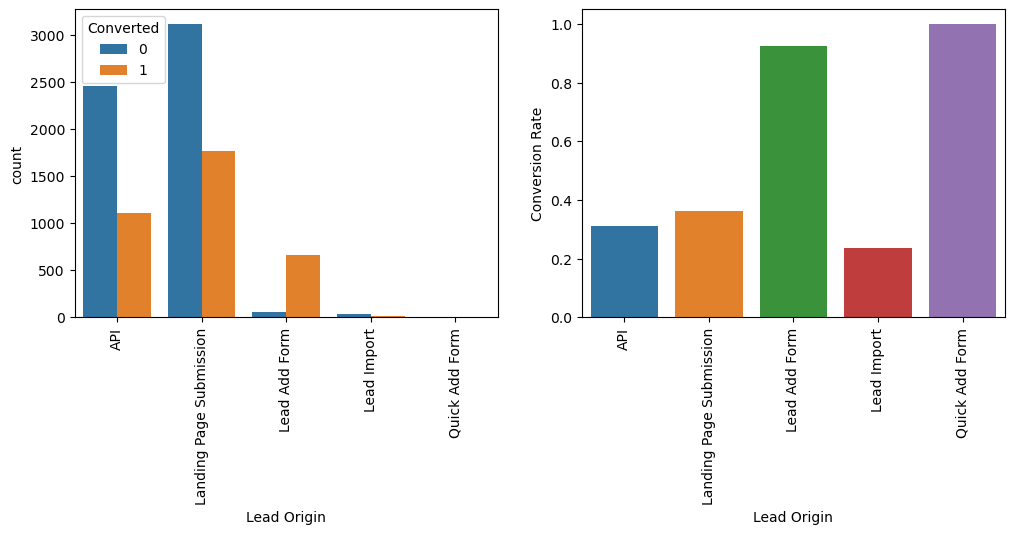

In [1776]:
plot_ctg(df,'Lead Origin')

Inference:
- Although the main source of customers come from API and Landing Page Submissions, the conversion rate of 'Lead Add Form' is the highest over 90%. 
 - Quick add form' has only 1 observation, therefore it has no statistical significance.

Lead Source

In [1777]:
lead_source_count = df['Lead Source'].value_counts()
lead_source_count

Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [1778]:
lead_source_smaller_10 = lead_source_count[lead_source_count.values <10]

In [1779]:
df['Lead Source'] =  df['Lead Source'].replace(lead_source_smaller_10.index , 'Others' )
df['Lead Source'].value_counts()

Google              2904
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Facebook              55
Others                28
Name: Lead Source, dtype: int64

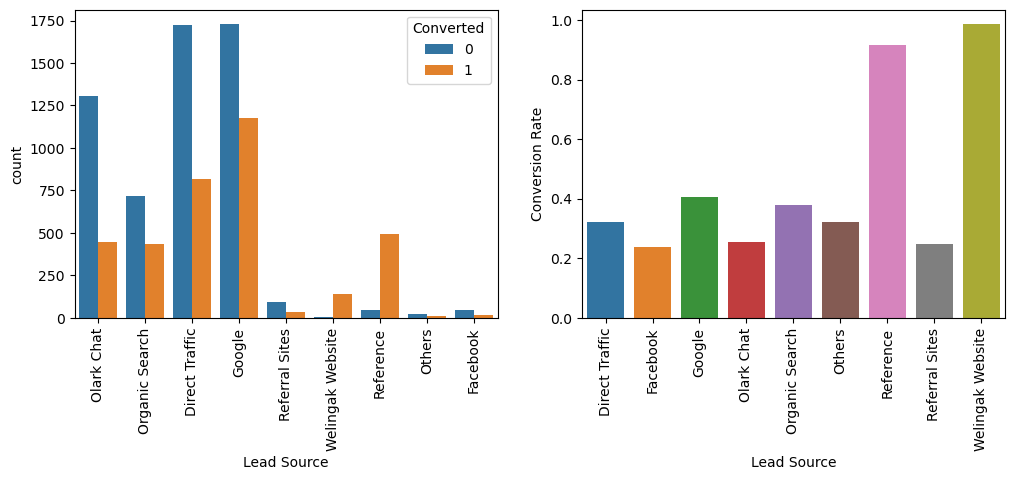

In [1780]:
plot_ctg(df,'Lead Source')

Inference:
- Welingak website' and 'Reference' are two lead sources that have significantly higher conversion rates than the other lead sources

Do not email

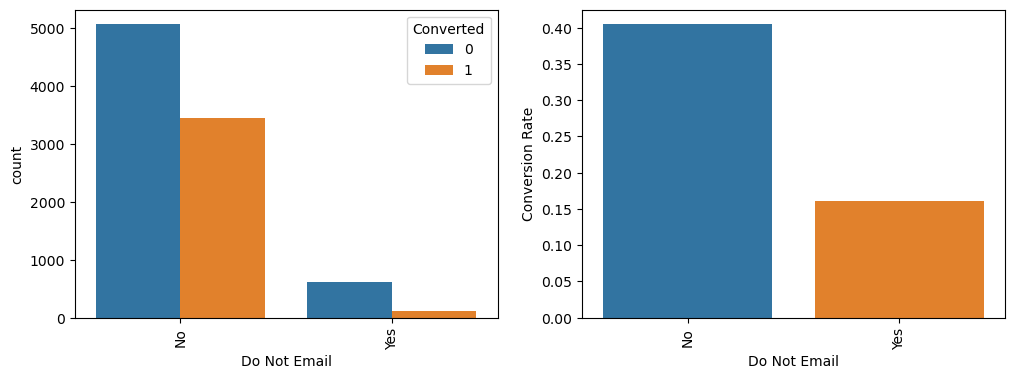

In [1781]:
plot_ctg(df,'Do Not Email')

Inference:
- We can easily observe that customers who don't send email ad have a significantly lower conversion rate

Do Not Call

In [1782]:
# Inspect do not call
df['Do Not Call'].value_counts()

No     9238
Yes       2
Name: Do Not Call, dtype: int64

We can easily see that there are only 2 customers who request not calling, which is very small compared to the 9238 customers who did not request. This data is imbalanced, so we will remove this feature

In [1783]:
# Remove col 'Do not call'
df.drop(columns='Do Not Call',inplace = True)

Last Activity

In [1784]:
last_activity_count = df['Last Activity'].value_counts()
last_activity_count

Email Opened                    3540
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [1785]:
last_activity_count_smaller_10 = last_activity_count[last_activity_count.values < 10].index
last_activity_count_smaller_10

Index(['Approached upfront', 'View in browser link Clicked', 'Email Received',
       'Email Marked Spam', 'Visited Booth in Tradeshow',
       'Resubscribed to emails'],
      dtype='object')

In [1786]:
df['Last Activity'] =  df['Last Activity'].replace(last_activity_count_smaller_10 , 'Others' )
df['Last Activity'].value_counts()

Email Opened                 3540
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Form Submitted on Website     116
Unreachable                    93
Unsubscribed                   61
Had a Phone Conversation       30
Others                         21
Name: Last Activity, dtype: int64

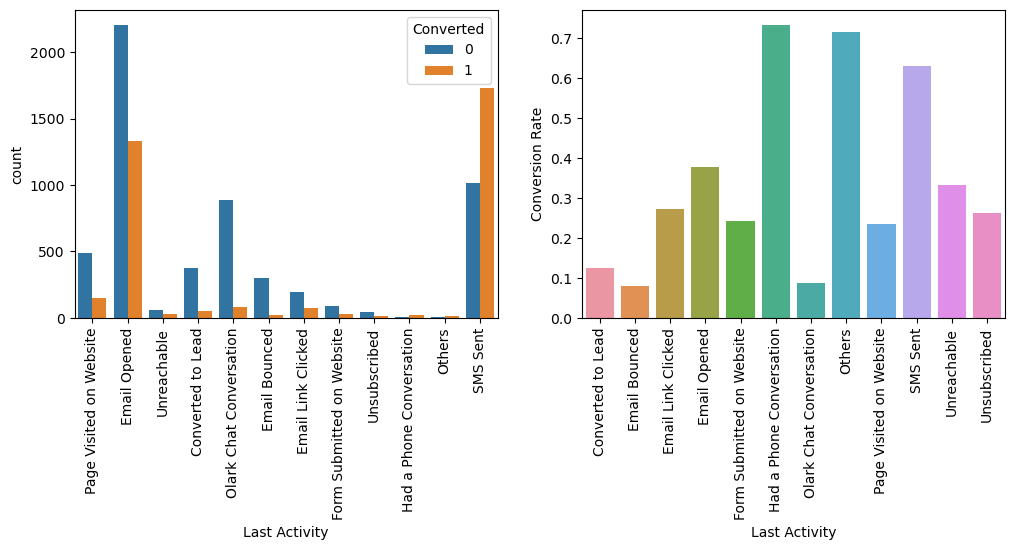

In [1787]:
plot_ctg(df,'Last Activity')


Inference:
- Customers who were last contacted via phone consultation or text message tend to have a higher conversion rate than other types of activities. Although 'others' activities also have high conversion rates, they have a small number of observations and many activities are grouped together, so they are not statistically significant

Country

In [1788]:
df.Country.value_counts()

India                   6492
other countries         2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

As we can see that most of the data consists of value 'India', no inference can be drawn from this parameter.Hence, we can drop this feature

In [1789]:
df.drop(columns='Country', inplace=True)

Occupation

In [1790]:
df.Occupation.value_counts()

Unemployed              5600
Other                   2706
Working Professional     706
Student                  210
Housewife                 10
Businessman                8
Name: Occupation, dtype: int64

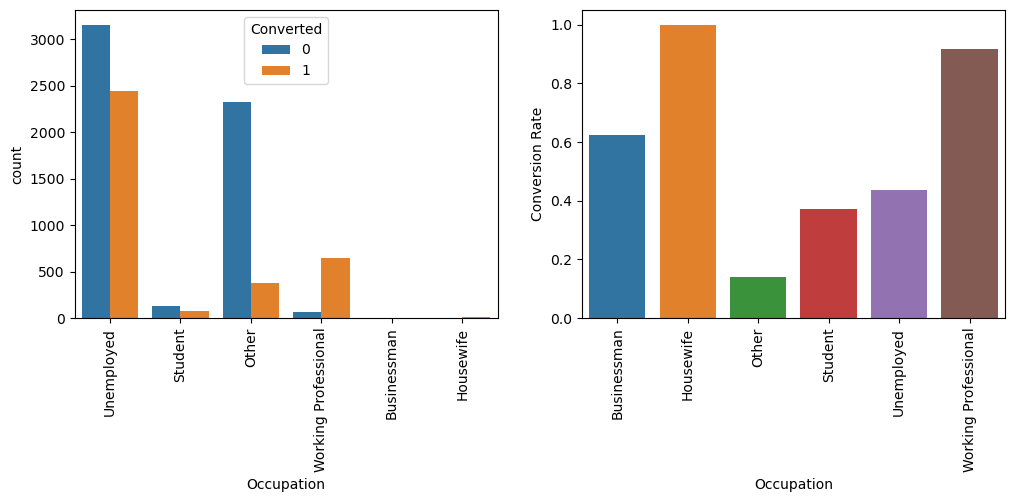

In [1791]:
plot_ctg(df,'Occupation')

Inference:
- Professional workers typically have a significantly higher course enrollment rate than other types of occupations

Matters

In [1792]:
df.Matters.value_counts()

Better Career Prospects      6528
Other                        2710
Flexibility & Convenience       2
Name: Matters, dtype: int64

The 'Flexibility & Convenience' group only has 2 observation values. Therefore, we will merge it with the 'Other' group

In [1793]:
# Replace Flexibility & Convenience with Others
df.Matters.replace('Flexibility & Convenience','Other',inplace=True)

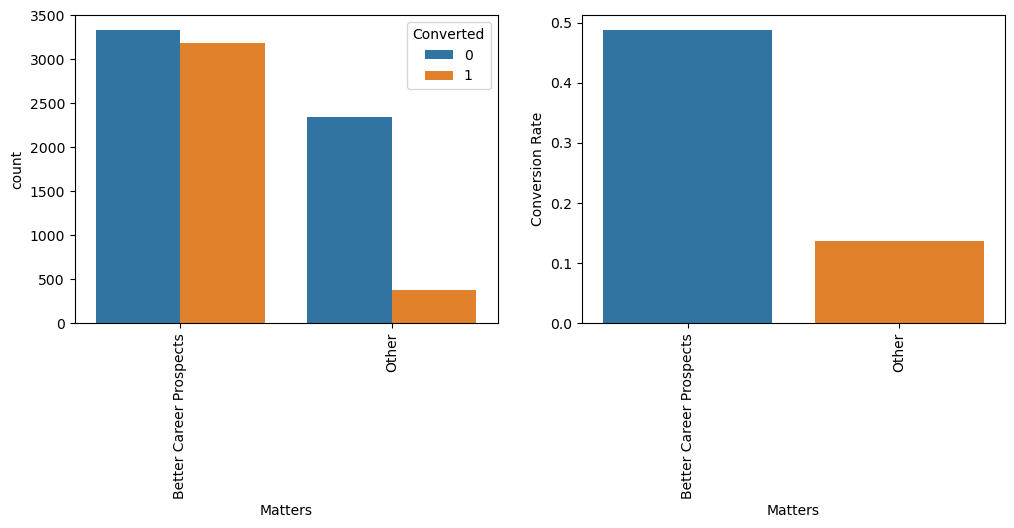

In [1794]:
plot_ctg(df,'Matters')

This column spread of variance is very low , hence it can be dropped

In [1795]:
df.drop(columns='Matters', inplace= True)

Last Notable Activity

In [1796]:
last_note_ac_count = df['Last Notable Activity'].value_counts()
last_note_ac_count

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [1797]:
# Replace all values that have value counts smaller than 10
last_note_ac_count_small = last_note_ac_count[last_note_ac_count.values < 10]
df['Last Notable Activity'].replace(last_note_ac_count_small.index,'Other', inplace=True)

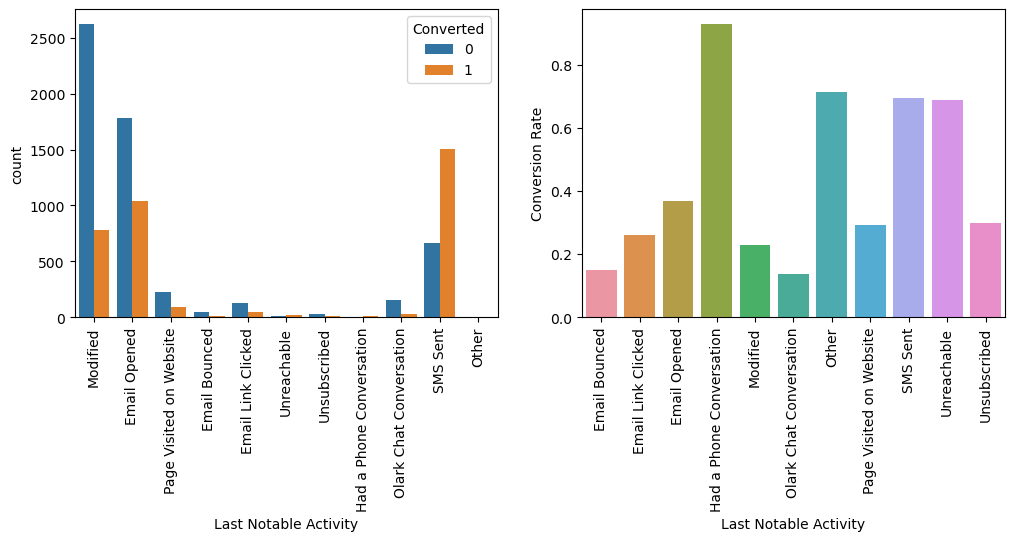

In [1798]:
plot_ctg(df,'Last Notable Activity')

Inference:
Although the final action of the customer is communication via phone and unreachable have a relatively high conversion rate, the number of observations is only 14. Based on the number of reliable observations, SMS sent has pretty high conversion rate

A free copy of Mastering The Interview

In [1799]:
df['A free copy of Mastering The Interview'].value_counts()

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

The name of this column is quite long, so we will shorten it

In [1800]:
# Rename columns'A free copy of Mastering The Interview' to 'Free interview book'
df.rename(columns={'A free copy of Mastering The Interview': 'Free interview book'}, inplace=True)

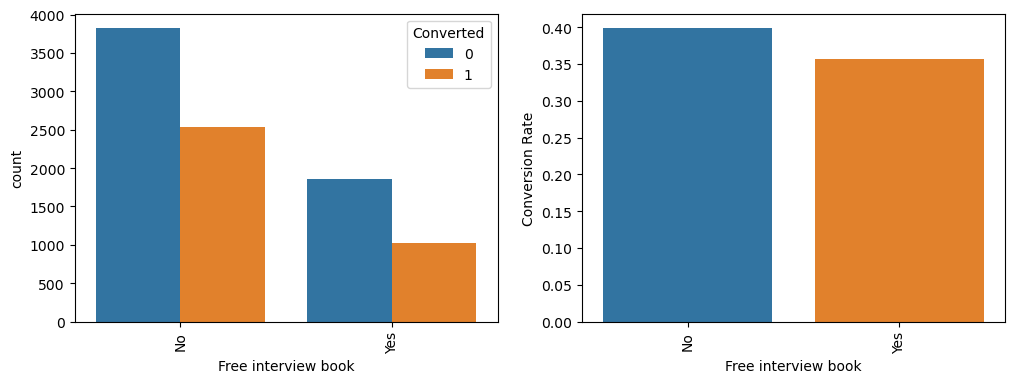

In [1801]:
plot_ctg(df,'Free interview book')

Drop Imbalance data

In [1802]:
df.Search.value_counts()

No     9226
Yes      14
Name: Search, dtype: int64

In [1803]:
df.Magazine.value_counts()

No    9240
Name: Magazine, dtype: int64

In [1804]:
df['Newspaper Article'].value_counts()

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [1805]:
df['X Education Forums'].value_counts()

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [1806]:
df.Newspaper.value_counts()

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [1807]:
df['Digital Advertisement'].value_counts()

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [1808]:
df['Through Recommendations'].value_counts()

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [1809]:
df['Receive More Updates About Our Courses'].value_counts()

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

In [1810]:
df['Update me on Supply Chain Content'].value_counts()

No    9240
Name: Update me on Supply Chain Content, dtype: int64

In [1811]:
df['Get updates on DM Content'].value_counts()

No    9240
Name: Get updates on DM Content, dtype: int64

In [1812]:
df['I agree to pay the amount through cheque'].value_counts()

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

The above columns have imbalanced data, so we will drop them

In [1813]:
df.drop(columns = ['Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement'
                  ,'Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content'
                  ,'Get updates on DM Content','I agree to pay the amount through cheque', 'Last Notable Activity', 'Last Activity'], inplace=True)

#### 3.4  Numerical Attributes Analysis

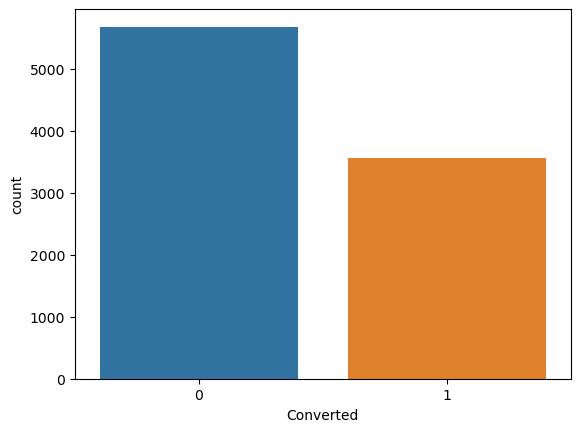

In [1814]:
# Plot Converted
sns.countplot(df.Converted)
plt.show()

In [1815]:
df.Converted.value_counts(normalize=True)

0    0.61461
1    0.38539
Name: Converted, dtype: float64

In [1816]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Occupation',
       'Free interview book'],
      dtype='object')

Currently, lead Conversion rate is 38% only 

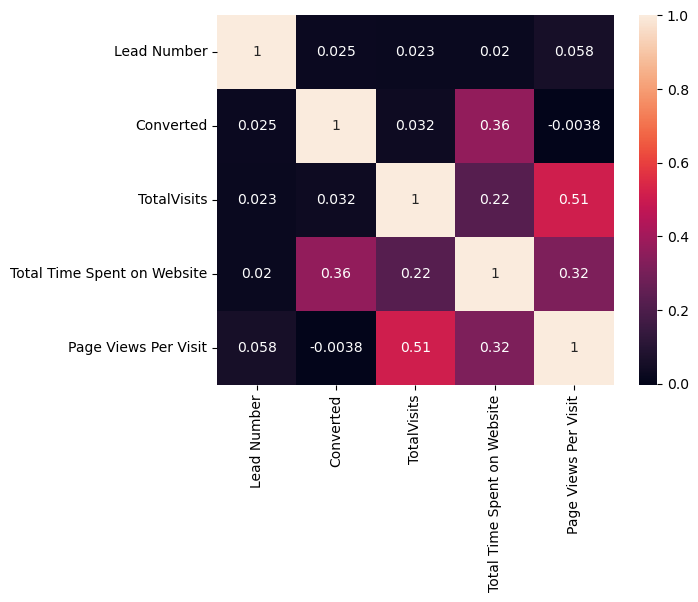

In [1817]:
# Check correclation of numerical values
sns.heatmap(df.corr(), annot = True)
plt.show()

Total Visit

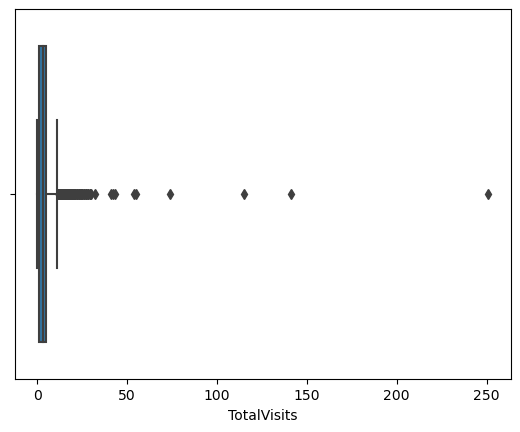

In [1818]:
#visualizing spread of variable Total Visits

sns.boxplot(df['TotalVisits'])
plt.show()

In [1819]:
df['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9240.000000
mean        3.455688
std         4.819476
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

99% of the values are between 0 and 17, while the remaining 1% ranges from 17 to 251, so we will remove this 1% ouliter

In [1820]:
df['TotalVisits'].quantile(0.99)

17.0

In [1821]:
# Remove ouliter
percentiles = df['TotalVisits'].quantile(0.99)
df = df[df['TotalVisits']<=17]

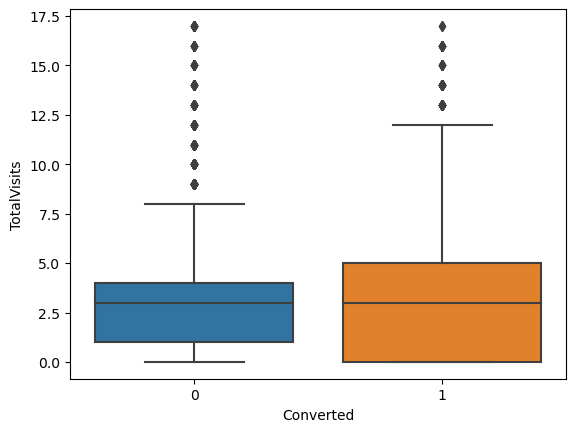

In [1822]:
# Plot the Total visit again
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df)
plt.show()

Inference:
- Based on the graph, we can only predict that customers who are converted to lead tend to have higher total visit numbers

Total time spent on website

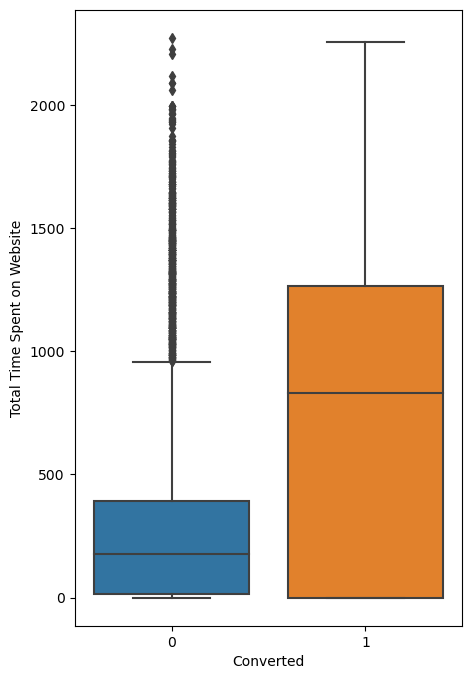

In [1823]:
#visualizing spread of variable Total Visits
plt.figure(figsize= [5,8])

sns.boxplot(x = 'Converted', y = 'Total Time Spent on Website', data= df)
plt.show()

Inference:
- The more time spent on the website, the higher the likelihood of conversion

Page Views Per Visit

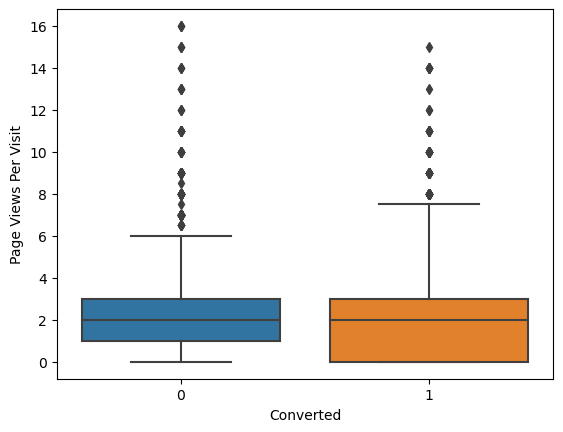

In [1824]:
# plot pageview per visit

sns.boxplot(x = 'Converted',y = 'Page Views Per Visit', data = df)
plt.show()

Inference:
- The number of page views per visit does not seem to differ much between the two groups.

### Step 4: Data Preparation

##### 4.1 Create Dummy Variable

In [1825]:
df_lead = df

In [1826]:
# Getting a list of categorical columns for creating dummy

cat_cols= df_lead.select_dtypes(include=['object']).columns
cat_cols

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Occupation', 'Free interview book'],
      dtype='object')

 Converting some binary variables (Yes/No) to 0/1

In [1827]:
# Applying the function to the housing list
df_lead['Do Not Email'] = df_lead['Do Not Email'].replace('Yes', 1).replace('No', 0)
df_lead['Free interview book'] = df_lead['Free interview book'].replace('Yes', 1).replace('No', 0)

In [1828]:
cat_cols = [x for x in cat_cols if x != 'Do Not Email' and x != 'Free interview book' and x != 'Prospect ID']

In [1829]:
cat_cols

['Lead Origin', 'Lead Source', 'Occupation']

In [1830]:
#getting dummies and dropping the first column and adding the results to the master dataframe

dummy = pd.get_dummies(df_lead[cat_cols], drop_first=True)
df_lead = pd.concat([df_lead,dummy],1)



In [1831]:
df_lead.drop(columns= cat_cols, inplace=True)

In [1832]:
df_lead.drop(columns= ['Prospect ID','Lead Number'], inplace=True)

In [1833]:
df_lead.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Free interview book,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,...,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,0,1,2.0,1532,2.0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,2.0,1428,1.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Step 5: Test-Train Split

In [1834]:
#Import library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [1835]:
# Putting feature variable to X
X=df_lead.drop('Converted', axis=1)
# Putting response variable to y
y = df_lead['Converted']

In [1836]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step 6: Feature Scaling

In [1837]:
#scaling of features
scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

#checking X-train dataset after scaling
X_train.head()



,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Free interview book,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,...,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional
6490,-0.298706,-0.749440,-0.831303,-0.649771,-0.673022,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4026,3.347778,-0.074990,-0.578290,-0.407577,-0.673022,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6453,-0.298706,2.960032,-0.130933,1.772164,1.485836,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8949,-0.298706,0.936684,-0.594791,-0.407577,-0.673022,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6467,-0.298706,2.622807,-0.767133,4.194099,1.485836,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


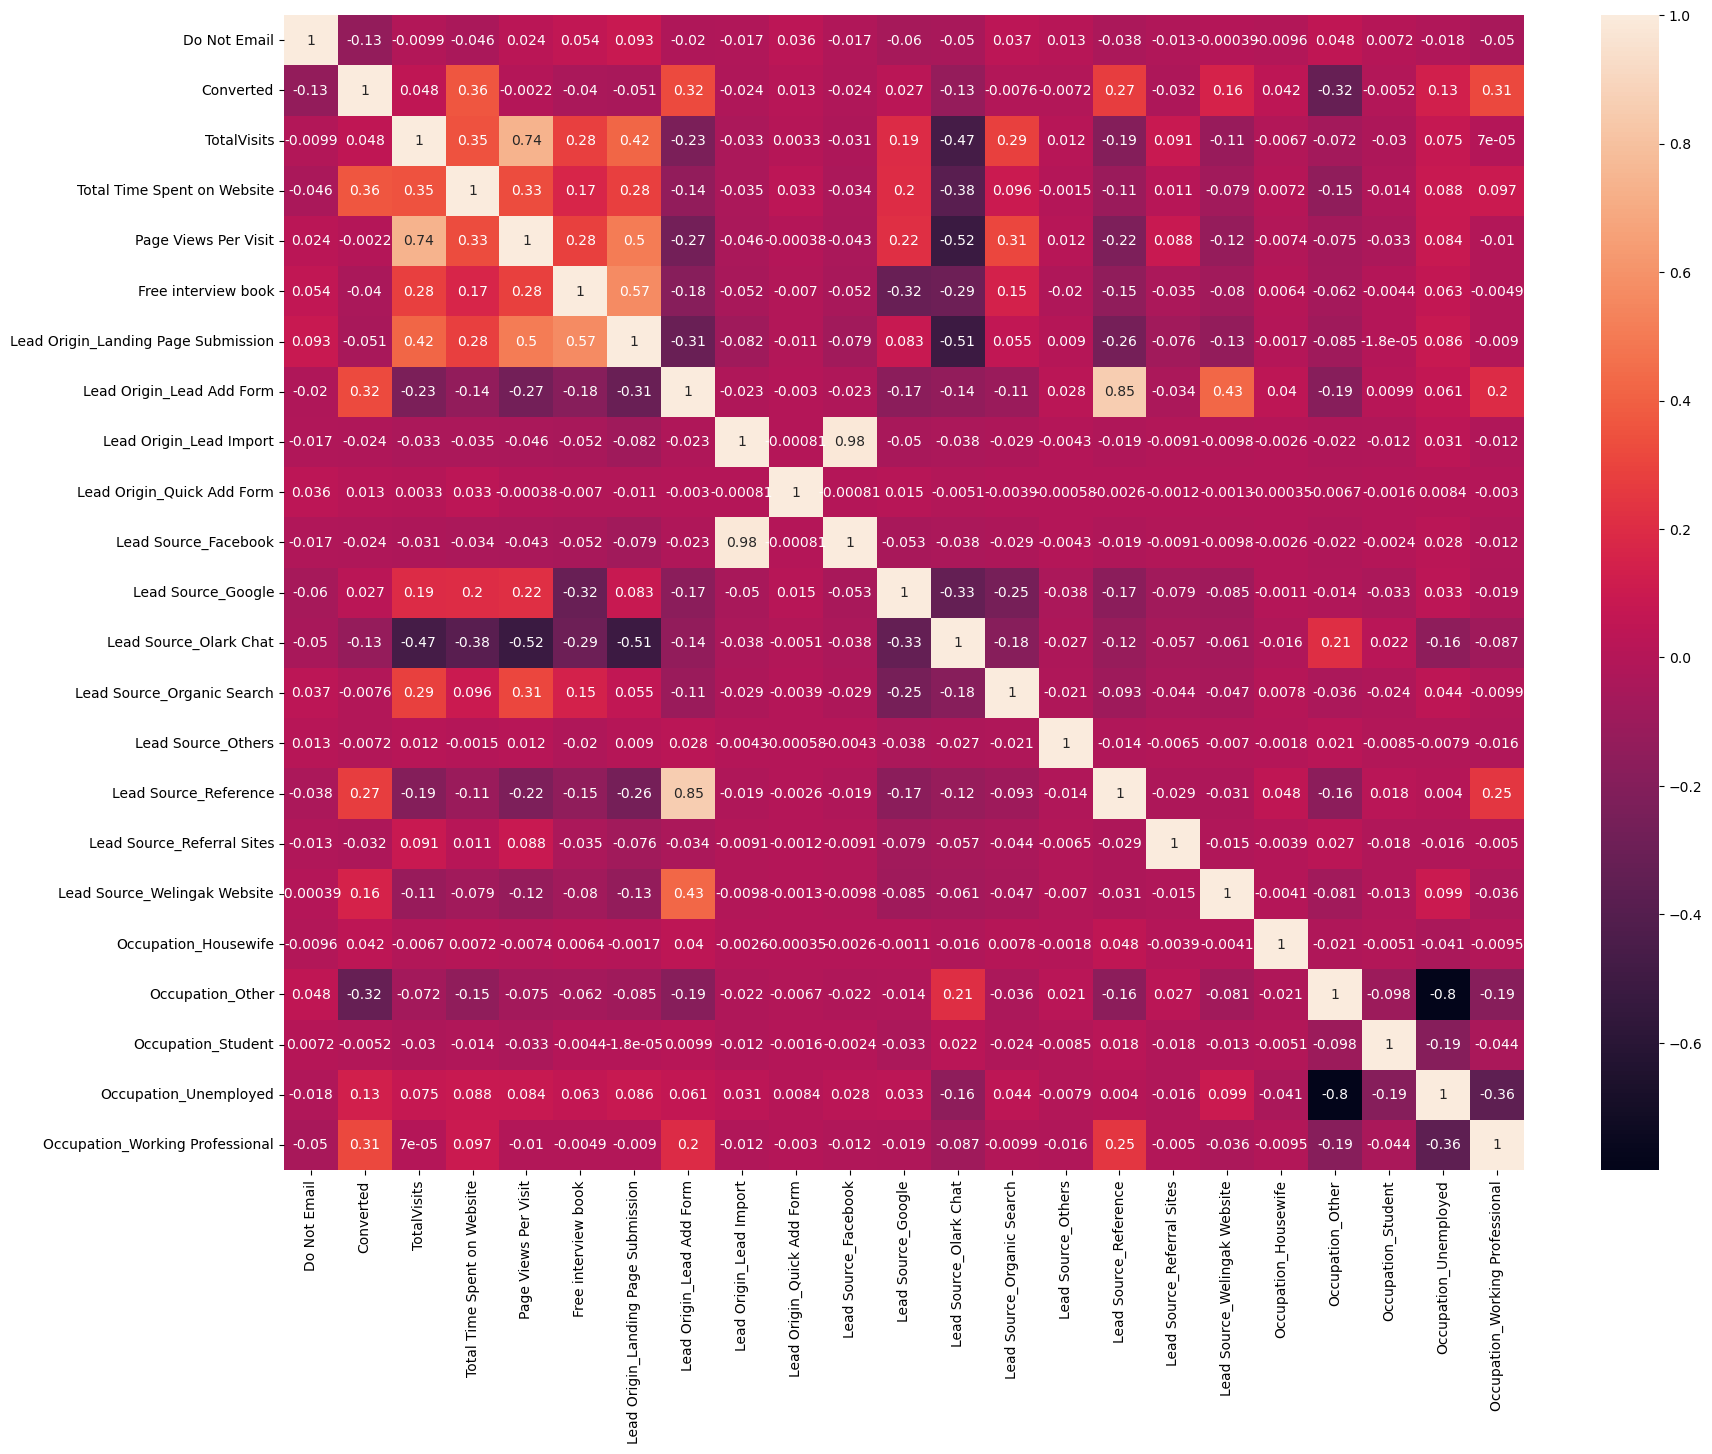

In [1839]:
# Correlation matrix
plt.figure(figsize = (20,15))
sns.heatmap(df_lead.corr(),annot = True)
plt.show()

### Step 7: Model Building using Stats Model & RFE

In [1840]:
# importing statsmodel
import statsmodels.api as sm

In [1841]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg,n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [1842]:
rfe.support_

array([ True, False,  True, False, False, False,  True,  True, False,
       False,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [1843]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 2),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 7),
 ('Free interview book', False, 8),
 ('Lead Origin_Landing Page Submission', False, 3),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Origin_Quick Add Form', False, 4),
 ('Lead Source_Facebook', False, 5),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 6),
 ('Lead Source_Others', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Welingak Website', True, 1),
 ('Occupation_Housewife', True, 1),
 ('Occupation_Other', True, 1),
 ('Occupation_Student', True, 1),
 ('Occupation_Unemployed', True, 1),
 ('Occupation_Working Professional', True, 1)]

In [1844]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Google', 'Lead Source_Olark Chat', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Occupation_Housewife',
       'Occupation_Other', 'Occupation_Student', 'Occupation_Unemployed',
       'Occupation_Working Professional'],
      dtype='object')

In [1845]:
#list of RFE not supported columns
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Free interview book',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Quick Add Form',
       'Lead Source_Facebook', 'Lead Source_Organic Search'],
      dtype='object')

##### Model 1

In [1846]:
#BUILDING MODEL #1

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6393
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2874.0
Date:                Tue, 07 Mar 2023   Deviance:                       5748.0
Time:                        23:29:58   Pearson chi2:                 7.38e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3546
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -0.2187      1.120     -0.195      0.845      -2.414       1.977
Do Not Email                       -0.3263      0.042     -7.756      0.000      -0.409      -0.244
Total Time Spent on Website         1.1363      0.039     29.042      0.000       1.060       1.213
Lead Origin_Lead Add Form           3.5991      0.568      6.332      0.000       2.485       4.713
Lead Origin_Lead Import             0.4871      0.423      1.152      0.249      -0.341       1.316
Lead Source_Google                  0.3048      0.077      3.947      0.000       0.153       0.456
Lead Source_Olark Chat              1.2814      0.102     12.582      0.000       1.082       1.481
Lead Source_Others                  0.3657      0.627      0.583      0.560      -0.863       1.595
Lead Source_Reference               0.0954      0.602      0.158      0.874      -1.084       1.275
Lead Source_Referral Sites         -0.5532      0.333     -1.661      0.097      -1.206       0.099
Lead Source_Welingak Website        2.0932      0.915      2.287      0.022       0.299       3.887
Occupation_Housewife               20.7663   1.66e+04      0.001      0.999   -3.24e+04    3.25e+04
Occupation_Other                   -2.1201      1.122     -1.890      0.059      -4.319       0.078
Occupation_Student                 -1.1147      1.137     -0.980      0.327      -3.344       1.115
Occupation_Unemployed              -0.7323      1.120     -0.654      0.513      -2.927       1.463
Occupation_Working Professional     1.6186      1.132      1.430      0.153      -0.600       3.837
===================================================================================================
"""

p-value of variable What is your current occupation_Housewife is high, so we can drop it.

In [1847]:
#dropping column with high p-value

col = col.drop('Occupation_Housewife',1)

#### Model 2

In [1848]:
#BUILDING MODEL #2

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6394
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2874.8
Date:                Tue, 07 Mar 2023   Deviance:                       5749.6
Time:                        23:29:58   Pearson chi2:                 7.38e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3544
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.5068      0.891      0.569      0.569      -1.239       2.253
Do Not Email                       -0.3264      0.042     -7.756      0.000      -0.409      -0.244
Total Time Spent on Website         1.1372      0.039     29.065      0.000       1.061       1.214
Lead Origin_Lead Add Form           3.6003      0.568      6.334      0.000       2.486       4.714
Lead Origin_Lead Import             0.4875      0.423      1.153      0.249      -0.341       1.316
Lead Source_Google                  0.3046      0.077      3.944      0.000       0.153       0.456
Lead Source_Olark Chat              1.2814      0.102     12.580      0.000       1.082       1.481
Lead Source_Others                  0.3655      0.627      0.583      0.560      -0.863       1.594
Lead Source_Reference               0.0966      0.602      0.161      0.872      -1.083       1.276
Lead Source_Referral Sites         -0.5536      0.333     -1.662      0.096      -1.206       0.099
Lead Source_Welingak Website        2.0930      0.915      2.287      0.022       0.299       3.887
Occupation_Other                   -2.8457      0.893     -3.187      0.001      -4.596      -1.096
Occupation_Student                 -1.8403      0.912     -2.017      0.044      -3.629      -0.052
Occupation_Unemployed              -1.4579      0.891     -1.637      0.102      -3.203       0.287
Occupation_Working Professional     0.8932      0.906      0.986      0.324      -0.882       2.668
===================================================================================================
"""

<b>p-value of variable "Lead Source_Reference" is high, so we will drop it.

In [1849]:
#dropping column with high p-value

col = col.drop('Lead Source_Reference',1)

#### Model 3

In [1850]:
#BUILDING MODEL #3

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6395
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2874.8
Date:                Tue, 07 Mar 2023   Deviance:                       5749.6
Time:                        23:29:59   Pearson chi2:                 7.37e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3544
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.5083      0.890      0.571      0.568      -1.237       2.253
Do Not Email                       -0.3270      0.042     -7.800      0.000      -0.409      -0.245
Total Time Spent on Website         1.1372      0.039     29.065      0.000       1.061       1.214
Lead Origin_Lead Add Form           3.6861      0.198     18.586      0.000       3.297       4.075
Lead Origin_Lead Import             0.4867      0.423      1.151      0.250      -0.342       1.315
Lead Source_Google                  0.3030      0.077      3.956      0.000       0.153       0.453
Lead Source_Olark Chat              1.2806      0.102     12.588      0.000       1.081       1.480
Lead Source_Others                  0.3551      0.627      0.566      0.571      -0.874       1.584
Lead Source_Referral Sites         -0.5545      0.333     -1.665      0.096      -1.207       0.098
Lead Source_Welingak Website        2.0070      0.743      2.700      0.007       0.550       3.464
Occupation_Other                   -2.8463      0.893     -3.189      0.001      -4.596      -1.097
Occupation_Student                 -1.8412      0.912     -2.018      0.044      -3.629      -0.053
Occupation_Unemployed              -1.4587      0.890     -1.639      0.101      -3.204       0.286
Occupation_Working Professional     0.8928      0.905      0.986      0.324      -0.882       2.667
===================================================================================================
"""

<b>p-value of variable "Lead Source_Others" is high, so we will drop it.

In [1852]:
#dropping column with high p-value

col = col.drop('Lead Source_Others',1)

#### Model 4

In [1853]:
#BUILDING MODEL #4

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6396
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2875.0
Date:                Tue, 07 Mar 2023   Deviance:                       5750.0
Time:                        23:30:14   Pearson chi2:                 7.38e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3544
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.5094      0.890      0.572      0.567      -1.236       2.255
Do Not Email                       -0.3267      0.042     -7.792      0.000      -0.409      -0.245
Total Time Spent on Website         1.1370      0.039     29.063      0.000       1.060       1.214
Lead Origin_Lead Add Form           3.6884      0.198     18.602      0.000       3.300       4.077
Lead Origin_Lead Import             0.4846      0.423      1.147      0.252      -0.344       1.313
Lead Source_Google                  0.3009      0.076      3.933      0.000       0.151       0.451
Lead Source_Olark Chat              1.2780      0.102     12.578      0.000       1.079       1.477
Lead Source_Referral Sites         -0.5564      0.333     -1.671      0.095      -1.209       0.096
Lead Source_Welingak Website        2.0025      0.743      2.694      0.007       0.546       3.459
Occupation_Other                   -2.8435      0.893     -3.185      0.001      -4.593      -1.094
Occupation_Student                 -1.8411      0.912     -2.018      0.044      -3.629      -0.053
Occupation_Unemployed              -1.4579      0.890     -1.638      0.102      -3.203       0.287
Occupation_Working Professional     0.8927      0.905      0.986      0.324      -0.882       2.667
===================================================================================================
"""

In [1854]:
#dropping column with high p-value

col = col.drop('Lead Origin_Lead Import',1)

#### Model 5

In [1855]:
#BUILDING MODEL #5

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6397
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2875.6
Date:                Tue, 07 Mar 2023   Deviance:                       5751.2
Time:                        23:30:21   Pearson chi2:                 7.37e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3543
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.5137      0.890      0.577      0.564      -1.231       2.258
Do Not Email                       -0.3272      0.042     -7.808      0.000      -0.409      -0.245
Total Time Spent on Website         1.1342      0.039     29.072      0.000       1.058       1.211
Lead Origin_Lead Add Form           3.6791      0.198     18.574      0.000       3.291       4.067
Lead Source_Google                  0.2943      0.076      3.861      0.000       0.145       0.444
Lead Source_Olark Chat              1.2680      0.101     12.537      0.000       1.070       1.466
Lead Source_Referral Sites         -0.5629      0.333     -1.692      0.091      -1.215       0.089
Lead Source_Welingak Website        2.0018      0.743      2.693      0.007       0.545       3.459
Occupation_Other                   -2.8403      0.892     -3.184      0.001      -4.589      -1.092
Occupation_Student                 -1.8404      0.912     -2.019      0.044      -3.627      -0.053
Occupation_Unemployed              -1.4544      0.890     -1.635      0.102      -3.198       0.290
Occupation_Working Professional     0.8951      0.905      0.989      0.323      -0.878       2.669
===================================================================================================
"""

In [1856]:
#dropping column with high p-value

col = col.drop('Lead Source_Referral Sites',1)

#### Model 6

In [1857]:
#BUILDING MODEL #6

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6398
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2877.1
Date:                Tue, 07 Mar 2023   Deviance:                       5754.2
Time:                        23:30:29   Pearson chi2:                 7.37e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3540
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.5052      0.890      0.567      0.570      -1.240       2.250
Do Not Email                       -0.3252      0.042     -7.763      0.000      -0.407      -0.243
Total Time Spent on Website         1.1343      0.039     29.079      0.000       1.058       1.211
Lead Origin_Lead Add Form           3.6918      0.198     18.650      0.000       3.304       4.080
Lead Source_Google                  0.3091      0.076      4.079      0.000       0.161       0.458
Lead Source_Olark Chat              1.2831      0.101     12.727      0.000       1.086       1.481
Lead Source_Welingak Website        2.0024      0.743      2.694      0.007       0.546       3.459
Occupation_Other                   -2.8474      0.892     -3.191      0.001      -4.597      -1.098
Occupation_Student                 -1.8400      0.912     -2.018      0.044      -3.627      -0.053
Occupation_Unemployed              -1.4604      0.890     -1.641      0.101      -3.205       0.284
Occupation_Working Professional     0.8887      0.905      0.982      0.326      -0.885       2.663
===================================================================================================
"""

#### Calculating VIF

In [1858]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Occupation_Unemployed,1.80
3,Lead Source_Google,1.74
4,Lead Source_Olark Chat,1.73
6,Occupation_Other,1.54
2,Lead Origin_Lead Add Form,1.53
1,Total Time Spent on Website,1.26
5,Lead Source_Welingak Website,1.25
9,Occupation_Working Professional,1.21
7,Occupation_Student,1.03
0,Do Not Email,1.02


#### Predicting a Train model

In [1859]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

6490    0.183632
4026    0.083867
6453    0.267644
8949    0.227293
6467    0.194796
3481    0.038399
2209    0.722851
1608    0.331152
2969    0.070894
8560    0.351547
dtype: float64

In [1860]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.18363211, 0.08386678, 0.2676445 , 0.22729342, 0.1947959 ,
       0.03839892, 0.72285149, 0.33115197, 0.07089417, 0.35154739])

In [1861]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.183632,6490
1,1,0.083867,4026
2,1,0.267644,6453
3,1,0.227293,8949
4,0,0.194796,6467


In [1862]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.183632,6490,0
1,1,0.083867,4026,0
2,1,0.267644,6453,0
3,1,0.227293,8949,0
4,0,0.194796,6467,0


<b><font color =green size =3>Metrics -Accuracy, Sensitivity, Specificity, False Positive Rate, Postitive Predictive Value and Negative Predictive Value</font>

In [1863]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3512  417]
 [ 863 1617]]


In [1864]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8002808550475893


In [1865]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [1866]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.652016129032258

In [1867]:
# Let us calculate specificity
TN / float(TN+FP)

0.8938661236955968

In [1868]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.10613387630440316


In [1869]:
# positive predictive value 
print (TP / float(TP+FP))

0.7949852507374632


In [1870]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8027428571428571


#### Plotting ROC curve

An ROC curve demonstrates several things:<br>

<ul><li>It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).</li>
<li>The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.</li>
<li>The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.</li></ul>

In [1871]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [1872]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )


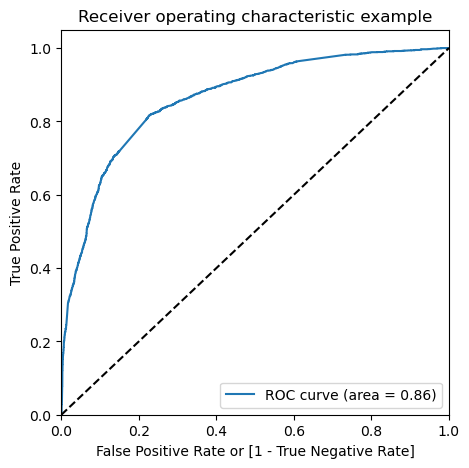

In [1873]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

<B>The ROC Curve should be a value close to 1. We are getting a good value of 0.86 indicating a good predictive model.</B>

##### Finding Optimal Cutoff Point

In [1874]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.183632,6490,0,1,1,0,0,0,0,0,0,0,0
1,1,0.083867,4026,0,1,0,0,0,0,0,0,0,0,0
2,1,0.267644,6453,0,1,1,1,0,0,0,0,0,0,0
3,1,0.227293,8949,0,1,1,1,0,0,0,0,0,0,0
4,0,0.194796,6467,0,1,1,0,0,0,0,0,0,0,0


In [1875]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.386956  1.000000  0.000000
0.1   0.1  0.531128  0.982661  0.246119
0.2   0.2  0.700421  0.905242  0.571138
0.3   0.3  0.778125  0.829032  0.745991
0.4   0.4  0.802621  0.703226  0.865360
0.5   0.5  0.800281  0.652016  0.893866
0.6   0.6  0.786862  0.582258  0.916009
0.7   0.7  0.760493  0.481452  0.936625
0.8   0.8  0.735996  0.371371  0.966149
0.9   0.9  0.687627  0.204435  0.992619


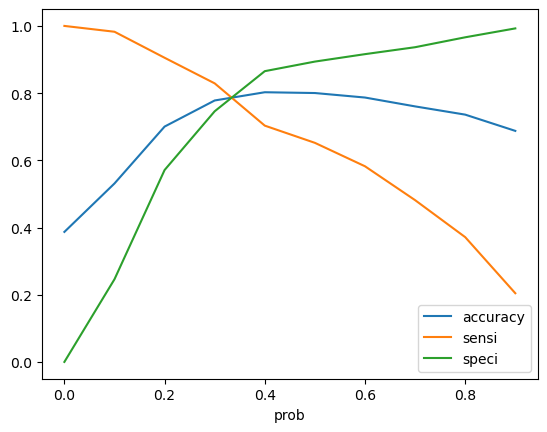

In [1876]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [1877]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.183632,6490,0,1,1,0,0,0,0,0,0,0,0,0
1,1,0.083867,4026,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.267644,6453,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.227293,8949,0,1,1,1,0,0,0,0,0,0,0,0
4,0,0.194796,6467,0,1,1,0,0,0,0,0,0,0,0,0


In [1878]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.183632,6490,0,18
1,1,0.083867,4026,0,8
2,1,0.267644,6453,0,27
3,1,0.227293,8949,0,23
4,0,0.194796,6467,0,19


In [1879]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion / non conversion counts from the actual converted rates

checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_Predicted']]
checking_df['final_Predicted'].value_counts()

1    2056
0     424
Name: final_Predicted, dtype: int64

In [1926]:
# check the precentage of final_predicted conversions

2056/float(2057+424)

0.8286981056025796

we can see that the final prediction of conversions have a target of 83% conversion as per the X Educations CEO's requirement . Hence, we can say that this is a good model.

In [1881]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.7781245124044313

In [1882]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[2931,  998],
       [ 424, 2056]], dtype=int64)

In [1883]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1884]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8290322580645161

In [1885]:
# Let us calculate specificity
TN / float(TN+FP)

0.7459913463985747

Inference:
So as we can see above the model seems to be performing well. The ROC curve has a value of 0.86, which is very good. We have the following values for the Train Data:

- Accuracy : 77.89%
- Sensitivity :82.94%
- Specificity : 74.7%
    

In [1886]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.25400865360142527


In [1887]:
# Positive predictive value 
print (TP / float(TP+FP))

0.673215455140799


In [1888]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8736214605067064


<b><font color= green size =3>Precision and Recall</font></b>

In [1889]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[2931,  998],
       [ 424, 2056]], dtype=int64)

In [1890]:
##### Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.673215455140799

In [1891]:
##### Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8290322580645161

In [1892]:
from sklearn.metrics import precision_score, recall_score

In [1893]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.673215455140799

In [1894]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8290322580645161

<b><font color= green size =3>Precision and Recall Trade-off</font></b>

In [1895]:
# importing precision recall curve from sklearn library
from sklearn.metrics import precision_recall_curve

In [1896]:
# Creating precision recall curve
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

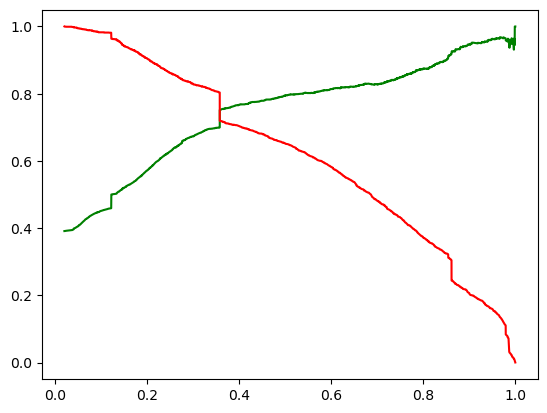

In [1897]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### Predictions on  the test set

In [1898]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Free interview book,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,...,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional
7359,3.648630,-0.073196,-0.209813,0.337263,1.508419,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2201,-0.274075,0.598003,-0.649354,0.087872,-0.662946,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2473,3.648630,1.940402,1.461527,-0.036823,-0.662946,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8388,-0.274075,-0.744395,-0.652972,-0.660300,1.508419,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2949,-0.274075,0.262404,-0.490179,-0.161518,1.508419,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [1899]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Welingak Website,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional
7359,3.648630,-0.209813,0,0,0,0,0,0,1,0
2201,-0.274075,-0.649354,0,0,0,0,0,0,1,0
2473,3.648630,1.461527,0,0,0,0,0,0,0,1
8388,-0.274075,-0.652972,0,0,0,0,0,0,1,0
2949,-0.274075,-0.490179,0,1,0,0,0,0,1,0


In [1900]:
X_test_sm = sm.add_constant(X_test)

In [1901]:
X_test_sm.shape

(2748, 11)

In [1902]:
y_test_pred = res.predict(X_test_sm)    

In [1903]:
y_test_pred[:10]

7359    0.084717
2201    0.167611
2473    0.865873
8388    0.167039
2949    0.247310
8144    0.151394
8443    0.357964
290     0.122261
8626    0.165617
5709    0.131173
dtype: float64

In [1904]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [1905]:
# Let's see the head
y_pred_1.head()

,0
7359,0.084717
2201,0.167611
2473,0.865873
8388,0.167039
2949,0.247310


In [1906]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [1907]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [1908]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [1909]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [1910]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,7359,0.084717
1,0,2201,0.167611
2,1,2473,0.865873
3,0,8388,0.167039
4,0,2949,0.247310


In [1911]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})


In [1912]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,7359,0.084717
1,0,2201,0.167611
2,1,2473,0.865873
3,0,8388,0.167039
4,0,2949,0.247310


#### Assigning Lead Score

In [1913]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [1914]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,7359,0,0.084717,8
1,2201,0,0.167611,17
2,2473,1,0.865873,87
3,8388,0,0.167039,17
4,2949,0,0.247310,25


In [1915]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [1916]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,7359,0,0.084717,8,0
1,2201,0,0.167611,17,0
2,2473,1,0.865873,87,1
3,8388,0,0.167039,17,0
4,2949,0,0.247310,25,0


In [1917]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_Predicted']]
checking_test_df['final_Predicted'].value_counts()

1    868
0    177
Name: final_Predicted, dtype: int64

In [1918]:
# check the precentage of final_predicted conversions on test data

865/float(865+177)

0.8301343570057581

We can see that the final prediction of conversions have a target rate of 83%  (same as predictions made on training data set)

<b><font color = green size =3>Overall Metrics - Accuracy, Confusion Metrics, Sensitivity, Specificity, False Postive Rate, Positive Predictive Value, Negative Predicitive Value on final prediction on test set

In [1919]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.7638282387190685

In [1920]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1231,  472],
       [ 177,  868]], dtype=int64)

In [1921]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1922]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.830622009569378

In [1923]:
# Let us calculate specificity
TN / float(TN+FP)

0.7228420434527305

<b><font color = green size =3>Precision and Recall metrics for the test set

In [1924]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.6477611940298508

In [1925]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.830622009569378

Inference:
After running the model on the Test Data these are the figures we obtain:

- Accuracy : 76.38%
- Sensitivity :83.06%
- Specificity : 72.28%

## Conclusion:


- While we have checked both Sensitivity-Specificity as well as Precision and Recall Metrics, we have considered the
  optimal 
  cut off based on Sensitivity and Specificity for calculating the final prediction.
- Accuracy, Sensitivity and Specificity values of test set are around 77%, 83% and 72% which are approximately closer to 
  the respective values calculated using trained set.
- Also the lead score calculated in the trained set of data shows the conversion rate on the final predicted model is 
  around 80%
- Hence overall this model seems to be good.   

Important features responsible for good conversion rate or the ones' which contributes more towards the probability of a lead getting converted are :
- Lead Origin_Lead Add Form
- Occupation_Working Professional
- Total Time Spent on Website